In [33]:
import pandas
import numpy
import statsmodels.formula.api as smf

In [12]:
data=pandas.read_csv(r"D:\Estudiar\Python\MLData\ads\Advertising.csv")

In [14]:
lm=smf.ols(formula="Sales~TV",data=data).fit()

In [15]:
lm.params

Intercept    7.032594
TV           0.047537
dtype: float64

In [18]:
lm.pvalues#la significancia, ya que los valores son tan pequeños se garantiza que los parametros son significativos y no son cero

Intercept    1.406300e-35
TV           1.467390e-42
dtype: float64

In [22]:
lm.rsquared

0.611875050850071

In [23]:
lm.rsquared_adj #tiene una modificacion en factor al numero de elemntos estudiados 

0.6099148238341623

In [26]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Sat, 23 Jan 2021   Prob (F-statistic):           1.47e-42
Time:                        14:46:09   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [28]:
sales_pred=lm.predict(pandas.DataFrame(data["TV"]))

In [29]:
sales_pred

0      17.970775
1       9.147974
2       7.850224
3      14.234395
4      15.627218
         ...    
195     8.848493
196    11.510545
197    15.446579
198    20.513985
199    18.065848
Length: 200, dtype: float64

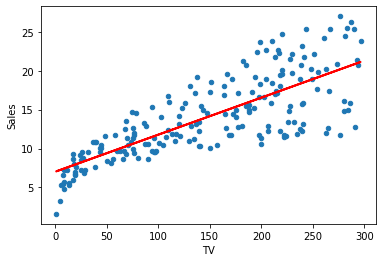

In [31]:
import matplotlib.pyplot as plt
%matplotlib inline
data.plot(kind="scatter",x="TV",y="Sales")
plt.plot(pandas.DataFrame(data["TV"]),sales_pred,c="red",linewidth=2)

In [32]:
data["Sales_pred"]=7.032594+0.047537*data["TV"]
data["RSE"]=(data["Sales"]-data["Sales_pred"])**2

In [37]:
SSD=sum(data["RSE"])
RSE=numpy.sqrt(SSD/(len(data)-2))

In [39]:
sales_m=numpy.mean(data["Sales"])
sales_m

14.0225

In [41]:
error=RSE/sales_m
error

0.23238768901680143

(array([ 4., 10., 13., 17., 40., 42., 33., 16., 17.,  8.]),
 array([-8.3860819 , -6.82624404, -5.26640618, -3.70656832, -2.14673046,
        -0.5868926 ,  0.97294526,  2.53278312,  4.09262098,  5.65245884,
         7.2122967 ]),
 <BarContainer object of 10 artists>)

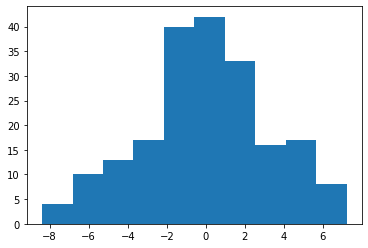

In [43]:
plt.hist(data["Sales"]-data["Sales_pred"]) #se grafica RSE antes de elevar al cuadrado

In [44]:
#regresion lineal multiple
#el paquete statsmodel para regresion multiple
#el numero de modelos es igual a 2**k -1 donde k son las variables predictoras 

In [46]:
lm2=smf.ols(formula="Sales~TV+Newspaper",data=data).fit()

In [49]:
lm2.params

Intercept    5.774948
TV           0.046901
Newspaper    0.044219
dtype: float64

In [51]:
lm2.pvalues

Intercept    3.145860e-22
TV           5.507584e-44
Newspaper    2.217084e-05
dtype: float64

In [53]:
lm2.rsquared

0.6458354938293271

In [55]:
lm2.rsquared_adj

0.6422399150864777

In [56]:
sales_pred=lm2.predict(data[["TV","Newspaper"]])

In [57]:
SSD=sum((data["Sales"]-sales_pred)**2)

In [58]:
SSD

1918.5618118968282

In [60]:
RSE=numpy.sqrt(SSD/(len(data)-2-1))

In [61]:
RSE

3.120719860252886

In [62]:
error=RSE/sales_m

In [63]:
error

0.22255089037282125

In [64]:
lm2=smf.ols(formula="Sales~TV+Radio",data=data).fit()

In [65]:
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     859.6
Date:                Sat, 23 Jan 2021   Prob (F-statistic):           4.83e-98
Time:                        18:52:38   Log-Likelihood:                -386.20
No. Observations:                 200   AIC:                             778.4
Df Residuals:                     197   BIC:                             788.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9211      0.294      9.919      0.000       2.340       3.502
TV             0.0458      0.001     32.909      0.000       0.043       0.048
Radio          0.1880      0.008     23.382      0.000       0.172       0.204
==============================================================================
Omnibus:                       60.022   Durbin-Watson:                   2.081
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              148.679
Skew:                          -1.323   Prob(JB):                     5.19e-33
Kurtosis:                       6.292   Cond. No.                         425.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [67]:
sales_pred=lm2.predict(data[["TV","Radio"]])
SSD=sum((data["Sales"]-sales_pred)**2)
RSE=numpy.sqrt(SSD/(len(data)-2-1))

In [68]:
RSE

1.681360912508001

In [69]:
RSE/sales_m

0.1199045043685506

In [73]:
lm4=smf.ols(formula="Sales~TV+Radio+Newspaper",data=data).fit()

In [75]:
lm4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Sat, 23 Jan 2021   Prob (F-statistic):           1.58e-96
Time:                        18:57:36   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
Radio          0.1885      0.009     21.893      0.000       0.172       0.206
Newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [78]:
sales_pred=lm4.predict(data[["TV","Radio","Newspaper"]])
SSD=sum((data["Sales"]-sales_pred)**2)
RSE=numpy.sqrt(SSD/(len(data)-3-1))

In [79]:
RSE

1.6855103734147439

In [80]:
RSE/sales_m

0.12020041885646238

In [81]:
#Multicolinealidad
#factor de inflacion de la varianza 
#escribir la funcion que nos da problemas respecto a las otras variables predictoras
# si el valor VIF es 1 no estan correlacionadas, si esta entre 1 y 5 estan moderadamente correlacionadas y se pueden quedar en el modelo, si supera 5 las varables son altamente correlacionadas y deben ser eliminadas
# Newspaper - TV + Radio -> R**2 VIF=1/(1-R**2)

In [86]:
# Newspaper - TV + Radio -> R**2 VIF=1/(1-R**2)
lm_n=smf.ols(formula="Newspaper~TV+Radio",data=data).fit()
rsquared_n=lm_n.rsquared
VIF=1/(1-rsquared_n)
VIF

1.1451873787239288

In [87]:
#TV - Newspaper + Radio -> R**2 VIF=1/(1-R**2)
lm_n=smf.ols(formula="TV~Newspaper+Radio",data=data).fit()
rsquared_n=lm_n.rsquared
VIF=1/(1-rsquared_n)
VIF

1.00461078493965

In [88]:
# Radio - TV + Newspaper -> R**2 VIF=1/(1-R**2)
lm_n=smf.ols(formula="Radio~Newspaper+TV",data=data).fit()
rsquared_n=lm_n.rsquared
VIF=1/(1-rsquared_n)
VIF

1.1449519171055351

In [ ]:
#Newspaper y radio estan correlacionadas por lo tanto se elige la que tiene un valor VIF mas pequeño